In [1]:
# Enable interactive plot
# %matplotlib notebook
# Enable interactive plot (Visual Studio Code)
%matplotlib ipympl

# Enable animation in Spyder 
# %matplotlib qt
# %matplotlib gt5

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

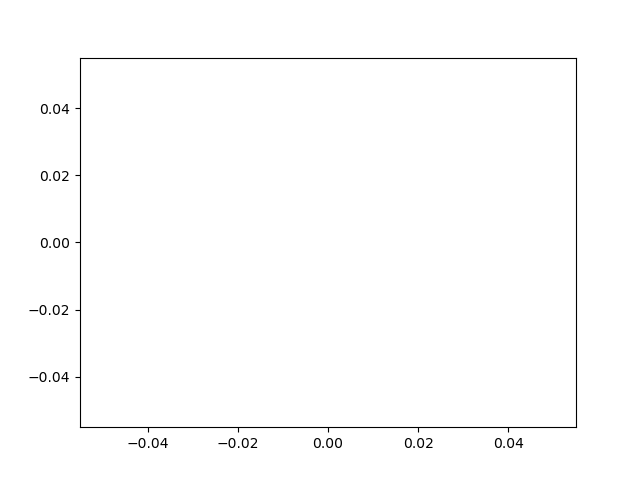

In [4]:
# Calcula los datos en tiempo real. 
def data_gen(t=0):
  cnt = 0
  while cnt < 1000:
    cnt += 1
    t += 0.1
    yield t, np.sin(2 * np.pi * t) * np.exp(-t / 10.)


# Necesitamos que se puede acceder a estas variables
# desde varias funciones -> globales
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
xdata, ydata = [], []

def init():
  ax.grid()
  ax.set_ylim(-1.1, 1.1)
  ax.set_xlim(0, 10)
  del xdata[:]
  del ydata[:]
  line.set_data(xdata, ydata)
  return line,


def run(data):
  # update the data
  t, y = data
  xdata.append(t)
  ydata.append(y)
  xmin, xmax = ax.get_xlim()

  # Si los datos salen del eje, agrandamos el eje
  # Después tenemos que redibujar el canvas manualmente
  if t >= xmax:
    ax.set_xlim(xmin, 2 * xmax)
    ax.figure.canvas.draw()
  line.set_data(xdata, ydata)

  return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False,
                              interval=30,repeat=False, init_func=init)

plt.show()